# Capture

In [ ]:
# %pip install mediapipe==0.9.0.1 scikit-learn==1.2.0 opencv-python==4.7.0.68 pandas==2.0.3


# %pip install -r requirements.txt

In [7]:
number_of_classes = 26  # Assuming you have 26 classes
dataset_size = 100

In [8]:
# import os
# import cv2

# DATA_DIR = './data'
# if not os.path.exists(DATA_DIR):
#     os.makedirs(DATA_DIR)

# number_of_classes = 26  # Assuming you have 26 classes
# dataset_size = 100

# cap = cv2.VideoCapture(0)

# try:
#     if not cap.isOpened():
#         print("Error: Could not open camera.")
#         exit()

#     for j in range(number_of_classes):
#         if not os.path.exists(os.path.join(DATA_DIR, str(j))):
#             os.makedirs(os.path.join(DATA_DIR, str(j)))

#         print('Collecting data for class {}'.format(j))

#         while True:
#             ret, frame = cap.read()
#             cv2.putText(frame, 'Ready? Press "S" to start capturing, "N" to skip, or "q" to exit!', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3, cv2.LINE_AA)
#             cv2.imshow('frame', frame)
#             key = cv2.waitKey(25)
            
#             if key == ord('s'):
#                 print("Capturing data for class {}".format(j))
#                 break
#             elif key == ord('n'):
#                 print("Skipping class {}".format(j))
#                 break
#             elif key == ord('q'):
#                 print("Exiting the program.")
#                 cap.release()
#                 cv2.destroyAllWindows()
                

#         if key == ord('n'):
#             continue  # Skip to the next class

#         counter = 0
#         while counter < dataset_size:
#             ret, frame = cap.read()
#             cv2.imshow('frame', frame)
#             cv2.waitKey(25)
#             cv2.imwrite(os.path.join(DATA_DIR, str(j), '{}.jpg'.format(counter)), frame)
#             counter += 1

# except Exception as e:
#     print("An error occurred:", e)

# finally:
#     cap.release()
#     cv2.destroyAllWindows()


In [9]:
# cap.release()
# cv2.destroyAllWindows()

# Deleting Images

In [10]:
# import os

# data_dir = 'data' 
# starting_label = 75
# for label in range(26):

#   label_folder = os.path.join(data_dir, str(label))

#   for img in os.listdir(label_folder):

#     filename, ext = os.path.splitext(img)
#     img_label = int(filename)

#     if img_label >= starting_label:
#       os.remove(os.path.join(label_folder, img))
      
# print(f"Deleted images from label {starting_label}")


# Data Augmentation 

In [11]:
# import os
# import cv2
# import numpy as np

# # Define the directory containing the dataset
# data_dir = 'data'

# # Define a list of data augmentation transformations
# augmentations = [
#     ('rotate_90_clockwise', lambda img: cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)),
#     ('rotate_90_counterclockwise', lambda img: cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)),
#     ('flip_horizontal', lambda img: cv2.flip(img, 1)),  # Flip horizontally
#     ('flip_vertical', lambda img: cv2.flip(img, 0)),    # Flip vertically
#     ('scale_up', lambda img: cv2.resize(img, None, fx=1.2, fy=1.2)),
#     ('scale_down', lambda img: cv2.resize(img, None, fx=0.8, fy=0.8))
# ]

# # Loop through each subfolder (class) in the data directory
# for class_folder in os.listdir(data_dir):
#     class_folder_path = os.path.join(data_dir, class_folder)
    
#     # Check the number of images in the class folder
#     num_images = len([name for name in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, name))])
    
#     # Calculate the number of augmented images needed
#     num_augmented_images_needed = max(0, 200 - num_images)
    
#     # If the number of images is less than 200, perform data augmentation
#     if num_images < 200:
#         # Get the maximum label number in the current class folder
#         max_label = max(100, max([int(img_file.split('_')[2].split('.')[0]) for img_file in os.listdir(class_folder_path) if img_file.endswith('.jpg') and 'augmented' in img_file], default=99))
        
#         # Loop through each image in the class folder
#         for img_file in os.listdir(class_folder_path):
#             img_path = os.path.join(class_folder_path, img_file)
            
#             # Read the image
#             img = cv2.imread(img_path)
            
#             # Apply each augmentation and save the augmented images
#             for aug_name, aug_func in augmentations:
#                 # Check if we still need to generate augmented images
#                 if num_augmented_images_needed > 0:
#                     augmented_img = aug_func(img)
#                     augmented_img_label = max_label + 1  # Increment the label for each new augmented image
#                     augmented_img_path = os.path.join(class_folder_path, f'{aug_name}_augmented_{augmented_img_label}.jpg')
#                     # augmented_img_path = os.path.join(class_folder_path, f'{augmented_img_label}.jpg')
#                     cv2.imwrite(augmented_img_path, augmented_img)
#                     max_label += 1  # Increment the max_label for the next image
#                     num_augmented_images_needed -= 1
#     else:
#         print(f"Skipping augmentation for {class_folder} as it already contains 200 or more images.")


# Now extracting features for all 26 classes

In [12]:
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

In [13]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)


In [14]:
DATA_DIR = './data'

data = []
labels = []

for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(dir_)

f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

# Train

In [15]:
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [16]:
def train_model_and_evaluate(model, data, labels, test_size=0.8, random_state=42):
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=random_state, shuffle=True, stratify=labels)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions on the testing data
    y_predict = model.predict(x_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict, average='weighted')
    recall = recall_score(y_test, y_predict, average='weighted')
    f1 = f1_score(y_test, y_predict, average='weighted')
    
    # Generate classification report
    report = classification_report(y_test, y_predict)

    cm = confusion_matrix(y_test,y_predict)
    # print(cm)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cmd.plot()
    return accuracy, precision, recall, f1, report



In [17]:
# Load data from pickle file
data_dict = pickle.load(open('./data.pickle', 'rb'))
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])


In [18]:
# Define models to train
models = [
    ("Random_Forest_Classifier", RandomForestClassifier(bootstrap=True, n_estimators=200, random_state=42,min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=None)),
    # ("Logistic_Regression", LogisticRegression()),
    # ("Support_Vector_Classifier_(SVC)", SVC(kernel='poly')),
    # ("K-Nearest_Neighbors_(KNN)", KNeighborsClassifier()),
    # ("Gradient_Boosting_Classifier", GradientBoostingClassifier())
]


Training and evaluating Random_Forest_Classifier...
Evaluation Metrics:
Accuracy: 0.9556
Precision: 0.9567
Recall: 0.9556
F1-score: 0.9557

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       160
           1       0.97      0.96      0.96       159
          10       0.92      0.96      0.94       160
          11       0.99      0.98      0.99       160
          12       1.00      0.92      0.96       160
          13       0.94      0.97      0.95       160
          14       0.99      0.98      0.98       160
          15       0.98      0.95      0.97       160
          16       1.00      0.94      0.97       160
          17       0.91      0.92      0.92       160
          18       0.87      0.90      0.88       160
          19       0.99      1.00      0.99        80
           2       0.96      1.00      0.98       160
          20       0.88      0.91      0.90       160
          21       0.97   

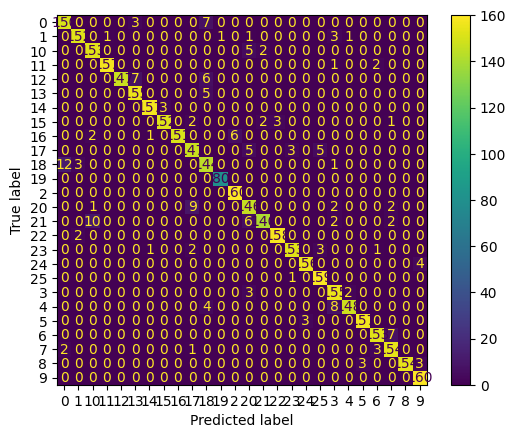

In [19]:
# Train and evaluate each model
for model_name, model in models:
    print(f"Training and evaluating {model_name}...")
    accuracy, precision, recall, f1, report = train_model_and_evaluate(model, data, labels)
    
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:")
    print(report)
    print("---------------------------------------")

    # Save the trained model to a file
    os.makedirs('./all_models/', exist_ok=True)
    with open(f'./all_models/{model_name}_model.p', 'wb') as f:
        pickle.dump({'model': model}, f)


# test

# Getting Model summary


#### Try this for Random Forest()

In [20]:
import pickle

# Load the trained model from the 'model.p' file
with open('./all_models/Random_Forest_Classifier_model.p', 'rb') as f:
    model_data = pickle.load(f)

# Extract the trained model object from the loaded data
model = model_data['model']

# Now you can access various properties and methods of the model to get a summary
# For example, you can print the parameters used to train the model
print("Model Parameters:")
print(model.get_params())

# You can also print the feature importances if available
if hasattr(model, 'feature_importances_'):
    print("\nFeature Importances:")
    print(model.feature_importances_)

# Additionally, you can print other relevant information about the model
print("\nModel Summary:")
print(model)

Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Feature Importances:
[0.02219636 0.01474177 0.01711791 0.01798286 0.01429153 0.01948617
 0.02181174 0.02648913 0.03461161 0.03580972 0.01352351 0.02243745
 0.01559953 0.02376058 0.02540218 0.02321169 0.02462029 0.02471985
 0.0220838  0.02644084 0.01641711 0.02706602 0.02100841 0.02901304
 0.02734872 0.03015215 0.02420017 0.01512934 0.02239596 0.02997122
 0.0207881  0.02945601 0.02365321 0.03465475 0.02714179 0.01717874
 0.02132645 0.01952682 0.0245021  0.0226386  0.0348291  0.03526364]

Model Summary:
RandomForestClassifier(max_features='log2', n_estimators=200, random_state=42)


### Improved [Tree visualization Controlled image size and dpi] 

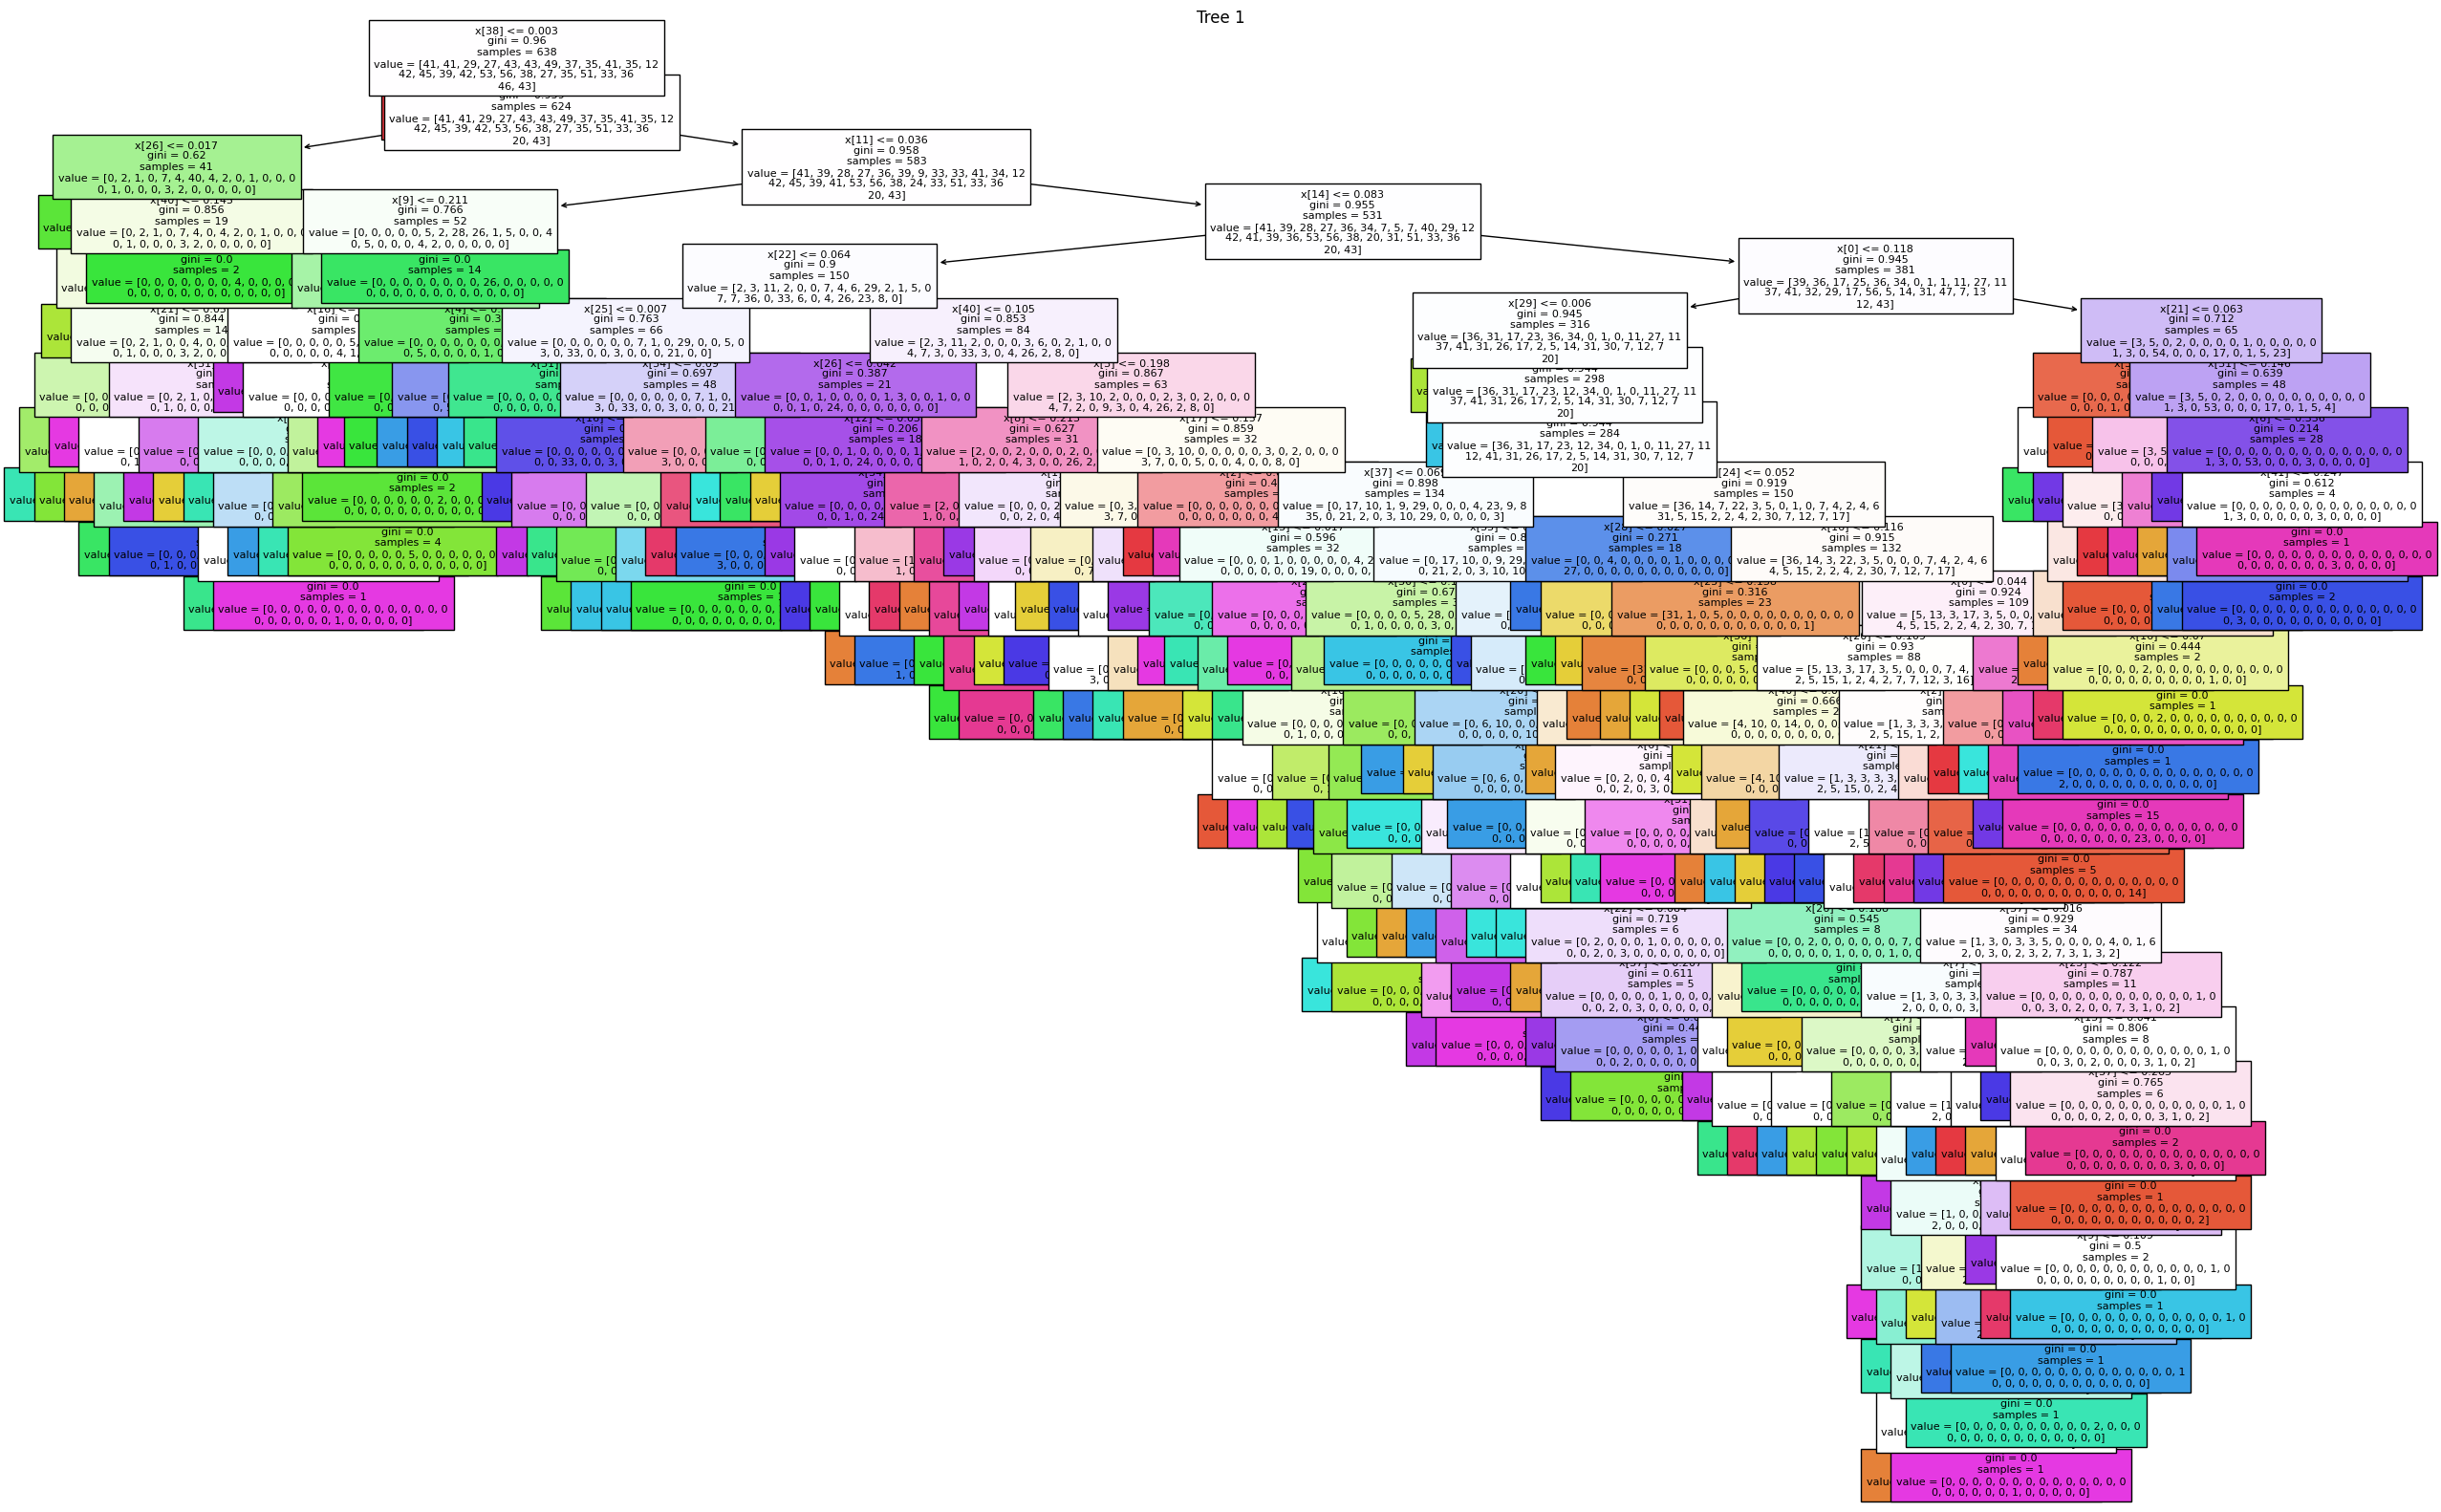

In [21]:
import pickle
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the trained RandomForestClassifier model from model.p
with open('./all_models/Random_Forest_Classifier_model.p', 'rb') as f:
    model = pickle.load(f)['model']

# Define the index of the tree you want to visualize
tree_index = 0  # Change this to the index of the tree you want to visualize

# Check if the specified index is within the range of the number of trees in the forest
if tree_index < len(model.estimators_):
    # Visualize the specified tree with improved image quality
    plt.figure(figsize=(30, 20))
    plot_tree(model.estimators_[tree_index], 
              filled=True, 
              feature_names=None,  # Set to None to use default feature names   
              class_names=None,    # Set to None to use default class names
              fontsize=8)          # Adjust fontsize to make text more visible
    plt.title(f'Tree {tree_index + 1}')
    # make dirs for images
    os.makedirs('./all_trees/', exist_ok=True)
    plt.savefig(f'./all_trees/tree_{tree_index + 1}_visualization.png', dpi=300)  # Save the plot as high-quality PNG
    plt.show()
else:
    print(f"Error: Tree index {tree_index} is out of range. There are only {len(model.estimators_)} trees in the forest.")


# Test

In [23]:
import pickle, cv2, mediapipe as mp, numpy as np

In [24]:
model_dict = pickle.load(open('./all_models/Random_Forest_Classifier_model.p', 'rb'))
model = model_dict['model']

In [25]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [26]:
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)
# labels from 0 to 12
labels_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z',26:'backspace',27:'space',28:'speak',29:'ready'}

- mp_hands.Hands(): This creates an instance of the MediaPipe Hands module, which is used for detecting hand landmarks in images or video frames.

- static_image_mode=True: This parameter indicates whether the module should process images as static images or video frames. When set to True, it indicates that the module will process static images (one-time analysis) rather than continuous video frames.

- min_detection_confidence=0.3: This parameter sets the minimum confidence score required for a hand landmark to be considered detected. Hand landmarks with confidence scores below this threshold will be ignored. In this case, a confidence score of 0.3 is used, meaning that hand landmarks must have a confidence score of at least 30% to be considered valid detections.

In [31]:
import cv2

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    try:
        # Data and variables initialization
        data_aux = []
        x_ = []
        y_ = []

        # Read a frame from the webcam
        ret, frame = cap.read()

        # Get the dimensions of the frame
        H, W, _ = frame.shape

        # Convert the frame to RGB color space
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame to detect hand landmarks
        results = hands.process(frame_rgb)

        # If hand landmarks are detected
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    frame,  # image to draw
                    hand_landmarks,  # model output
                    mp_hands.HAND_CONNECTIONS,  # hand connections
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            x1 = int(min(x_) * W) - 10
            y1 = int(min(y_) * H) - 10

            x2 = int(max(x_) * W) - 10
            y2 = int(max(y_) * H) - 10

            # Make predictions using the model
            prediction = model.predict([np.asarray(data_aux)])
            prediction_prob = model.predict_proba([np.asarray(data_aux)])

            # If predictions are available
            if prediction.shape[0] > 0:
                predicted_label_index = int(prediction[0])
                predicted_character = labels_dict.get(predicted_label_index, "Unknown")
                prediction_probability = np.max(prediction_prob)  # Get the maximum probability
            
            else:
                predicted_character = "Unknown"
                prediction_probability = 0.0  # Set probability to zero for unknown prediction


            # Draw bounding box and label on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
            if prediction_probability > 0.4:
                cv2.putText(frame, f'{predicted_character} ({prediction_probability:.2f})', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3, cv2.LINE_AA)
            else:
                cv2.putText(frame, f'{"Unknown"} ({prediction_probability:.2f})', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3, cv2.LINE_AA)

        # Display the frame
        cv2.imshow('frame', frame)

        # Check for user input to exit the loop
        c = cv2.waitKey(1)
        if c == ord('q'):
            break

    except Exception as e:
        # Print the exception
        print("An error occurred:", str(e))

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


An error occurred: X has 84 features, but RandomForestClassifier is expecting 42 features as input.
An error occurred: X has 84 features, but RandomForestClassifier is expecting 42 features as input.
An error occurred: X has 84 features, but RandomForestClassifier is expecting 42 features as input.
An error occurred: X has 84 features, but RandomForestClassifier is expecting 42 features as input.
An error occurred: X has 84 features, but RandomForestClassifier is expecting 42 features as input.
An error occurred: X has 84 features, but RandomForestClassifier is expecting 42 features as input.
An error occurred: X has 84 features, but RandomForestClassifier is expecting 42 features as input.
An error occurred: X has 84 features, but RandomForestClassifier is expecting 42 features as input.


---


# Final Editings


---

- Hyperparameter Tuning:
  - For Random Forest, tune parameters like n_estimators, max_depth, min_samples_split etc. using GridSearchCV.

- Define a parameter grid and search over combinations of values.
  - Select the parameters giving the best cross-validation score.

- Cross Validation:
  - Replace train_test_split with StratifiedKFold cross validator.
  - Train on one fold and evaluate on the remaining folds.
  - Calculate average accuracy/metrics over all folds.

- Plotting metrics:
  - Vary n_estimators from 10 to 1000 and plot cross-val accuracy vs n_estimators.
  - This helps select optimal number of trees.

- Model Comparison:
  - Store cross-val scores of all models in a DataFrame.
  - Plot a bar graph comparing average accuracy of different models.

---

In [32]:
import os
import pickle
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

def train_model_and_evaluate_cv(model, data, labels, n_splits=5, random_state=42):
    # Initialize StratifiedKFold cross-validator
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Lists to store evaluation metrics across folds
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    # Loop over folds
    for train_index, test_index in skf.split(data, labels):
        # Split data into training and testing sets for the current fold
        x_train, x_test = data[train_index], data[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        
        # Train the model on the training data
        model.fit(x_train, y_train)
        
        # Make predictions on the testing data
        y_predict = model.predict(x_test)
        
        # Calculate evaluation metrics for the current fold
        accuracy_scores.append(accuracy_score(y_test, y_predict))
        precision_scores.append(precision_score(y_test, y_predict, average='weighted'))
        recall_scores.append(recall_score(y_test, y_predict, average='weighted'))
        f1_scores.append(f1_score(y_test, y_predict, average='weighted'))
    
    # Compute average evaluation metrics across folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    
    # Generate classification report using the entire dataset
    model.fit(data, labels)
    y_predict_all = model.predict(data)
    report = classification_report(labels, y_predict_all)
    
    return avg_accuracy, avg_precision, avg_recall, avg_f1, report

# Redefine models with Random Forest only for hyperparameter tuning
models = [
    ("Random_Forest_Classifier", RandomForestClassifier())
]

# Parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion' : ['gini', 'entropy', 'log_loss']
}


In [33]:
# Perform hyperparameter tuning for Random Forest using GridSearchCV
best_models = []

for model_name, model in models:
    print(f"Tuning hyperparameters for {model_name}...")
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(data, labels)
    
    best_model = grid_search.best_estimator_
    best_models.append((model_name, best_model))
    print("Best parameters found:", grid_search.best_params_)

# Store best models to files
os.makedirs('./best_models/', exist_ok=True)
for model_name, model in best_models:
    with open(f'./best_models/{model_name}_best_model.p', 'wb') as f:
        pickle.dump({'model': model}, f)


Tuning hyperparameters for Random_Forest_Classifier...
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END criterion=gini, max_depth=None

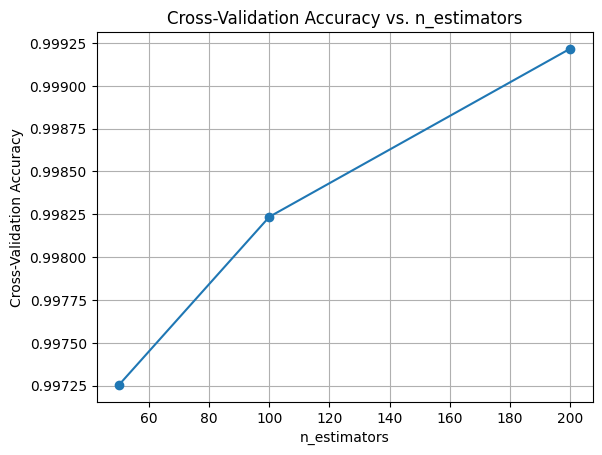

In [30]:
# Plot cross-validation accuracy vs. n_estimators for Random Forest
n_estimators_values = [50, 100, 200]
cv_accuracy_scores = []

for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    avg_accuracy, _, _, _, _ = train_model_and_evaluate_cv(rf_model, data, labels)
    cv_accuracy_scores.append(avg_accuracy)

plt.plot(n_estimators_values, cv_accuracy_scores, marker='o')
plt.title('Cross-Validation Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()


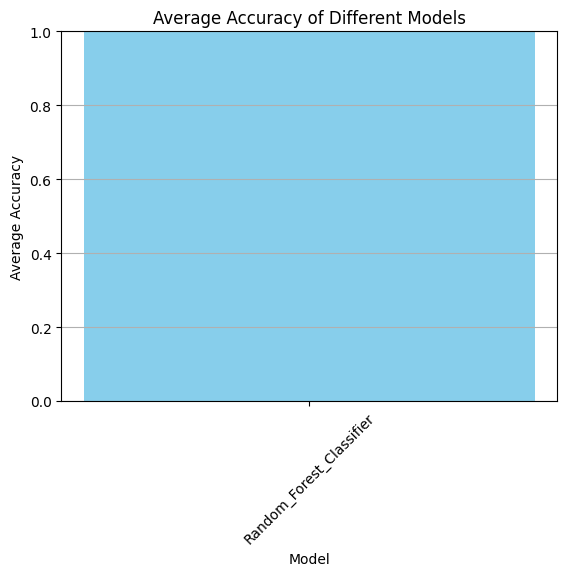

In [31]:
import pandas as pd

# Store cross-validation scores of all models in a DataFrame
model_names = [model_name for model_name, _ in best_models]
model_cv_scores = []

for _, model in best_models:
    avg_accuracy, _, _, _, _ = train_model_and_evaluate_cv(model, data, labels)
    model_cv_scores.append(avg_accuracy)

model_comparison_df = pd.DataFrame({'Model': model_names, 'Average Accuracy': model_cv_scores})

# Plot a bar graph comparing average accuracy of different models
plt.bar(model_comparison_df['Model'], model_comparison_df['Average Accuracy'], color='skyblue')
plt.title('Average Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
